## Description
In this notebook we will load Sentinel-2 data using two methods. Firstly, we will use dc.load() to return a time series of satellite images. Secondly, we will load a time series using the load_ard() function, which is a wrapper function around the dc.load module. This function will load all the images from Sentinel-2 and apply a cloud mask. The returned xarray.Dataset will contain analysis ready images with the cloudy and invalid pixels masked out.

In [1]:
import sys
sys.path.insert(1, '../tools/')
import datacube
from tools.datahandling import load_ard, mostcommon_crs
from tools.plotting import rgb
from odc.ui import with_ui_cbk

In [2]:
dc = datacube.Datacube(app='Sentinel-2')

In [3]:
# List Sentinel-2 products available in DE Africa
dc_products = dc.list_products()
display_columns = ['name', 'description']
dc_products[dc_products.name.str.contains(
    's2_l2a').fillna(
        False)][display_columns].set_index('name')

,description
name,
s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed..."


In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc['s2_l2a']

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
B01,B01,uint16,1,0.0,"[band_01, coastal_aerosol]",NaN
B02,B02,uint16,1,0.0,"[band_02, blue]",NaN
B03,B03,uint16,1,0.0,"[band_03, green]",NaN
B04,B04,uint16,1,0.0,"[band_04, red]",NaN
B05,B05,uint16,1,0.0,"[band_05, red_edge_1]",NaN
B06,B06,uint16,1,0.0,"[band_06, red_edge_2]",NaN
B07,B07,uint16,1,0.0,"[band_07, red_edge_3]",NaN
B08,B08,uint16,1,0.0,"[band_08, nir, nir_1]",NaN
B8A,B8A,uint16,1,0.0,"[band_8a, nir_narrow, nir_2]",NaN


In [5]:
# load data
lat, lon = 30.5, 31.7
buffer = 0.125

# Create a reusable query
query = {
    'x': (lon-buffer, lon+buffer),
    'y': (lat+buffer, lat-buffer),
    'time': ('2022-01-01', '2022-01-31'),
    'resolution': (-20, 20)
}

# Identify the most common projection system in the input query
output_crs = mostcommon_crs(dc=dc, product='s2_l2a', query=query)
print(output_crs)

# Load available data from Sentinel-2 and filter to retain only times
# with at least 90% good data
ds = load_ard(dc=dc, 
              products=['s2_l2a'],
              min_gooddata=0.9, 
              measurements=['red', 'green', 'blue'],
              output_crs=output_crs,
              progress_cbk=with_ui_cbk(),
              **query)
print(ds)

epsg:32636


Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 4 out of 6 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 4 time steps
<xarray.Dataset>
Dimensions:      (time: 4, y: 1400, x: 1217)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-03T08:41:48 ... 2022-01-23T08:...
  * y            (y) float64 3.389e+06 3.389e+06 ... 3.361e+06 3.361e+06
  * x            (x) float64 3.631e+05 3.631e+05 ... 3.874e+05 3.874e+05
    spatial_ref  int32 32636
Data variables:
    red          (time, y, x) float32 286.0 343.0 401.0 ... 2.43e+03 2.139e+03
    green        (time, y, x) float32 823.0 788.0 777.0 ... 1.921e+03 1.636e+03
    blue         (time, y, x) float32 403.0 419.0 425.0 ... 1.254e+03 1.063e+03
Attributes:
    crs:           epsg:32636
    grid_mapping:  spatial_ref


/usr/local/lib/python3.8/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


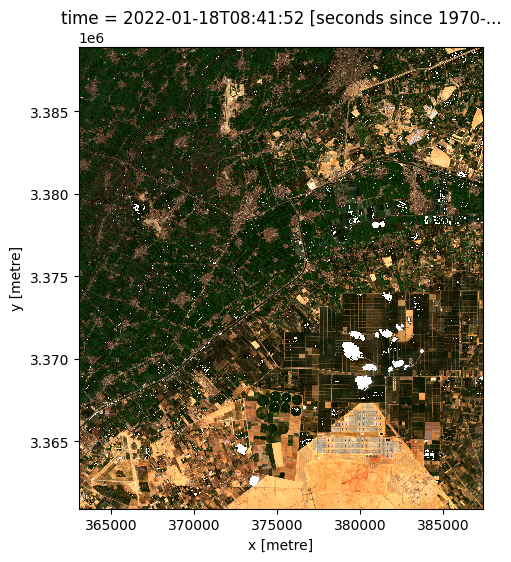

In [6]:
rgb(ds, index = [2])

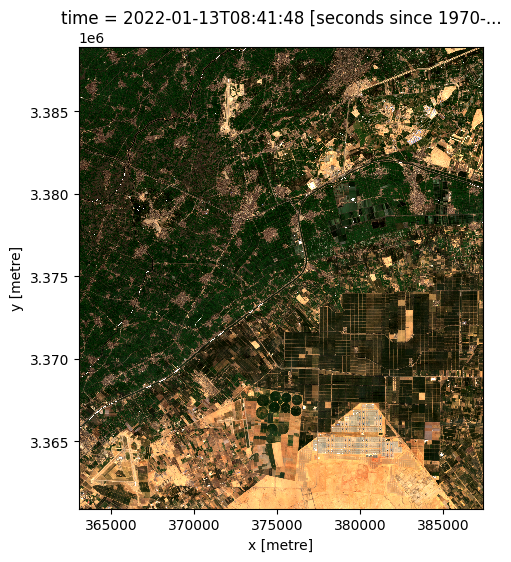

In [7]:
rgb(ds, index=[1])